In [1]:
import george
from george import kernels
import numpy as np
import matplotlib.pyplot as plt

In [2]:
freq = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
intensity = np.array([0.3, 0.2, 0.15, 0.12, 0.13, 0.18, 0.19, 0.21, 0.16, 0.2, 0.3])
intensity_err = 0.1 * np.ones_like(freq)

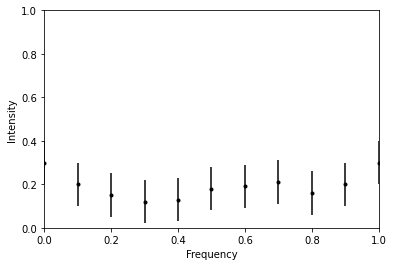

In [3]:
plt.errorbar(freq, intensity, yerr=intensity_err, fmt=".k", capsize=0)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel("Frequency")
plt.ylabel("Intensity");

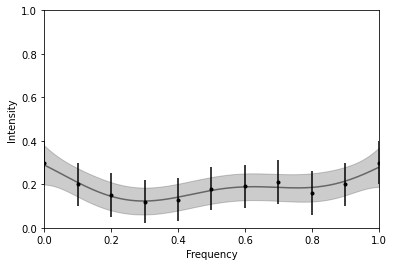

In [4]:
# kernel = np.var(y) * kernels.ExpSquaredKernel(0.5)
kernel = kernels.ExpSquaredKernel(0.1)
gp = george.GP(kernel)
gp.compute(freq, intensity_err)

x_pred = np.linspace(0, 1, 500)
pred, pred_var = gp.predict(intensity, x_pred, return_var=True)

plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
plt.plot(x_pred, pred, "k", lw=1.5, alpha=0.5)
plt.errorbar(freq, intensity, yerr=intensity_err, fmt=".k", capsize=0)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel("Frequency")
plt.ylabel("Intensity");